<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

In [1]:
%%HTML
<style type='text/css'>
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [2]:
df =pd.read_csv("car_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
df.groupby("Year")[["Selling_Price","Present_Price"]].max()*1000

,Selling_Price,Present_Price
Year,,
2003,2250.0,7980.0
2004,1500.0,12350.0
2005,3510.0,13700.0
2006,2500.0,23730.0
2007,200.0,750.0
2008,4000.0,22780.0
2009,3800.0,18610.0
2010,35000.0,92600.0
2011,4500.0,13740.0


In [4]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(include=object)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df.shape

(301, 9)

In [10]:
df.isnull().sum()*100/df.shape[0]

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [11]:
def first_glance(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [12]:
first_glance("Car_Name")

column name    :  Car_Name
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  98
--------------------------------
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


In [13]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [14]:
first_glance("Year")

column name    :  Year
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  16
--------------------------------
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64


In [15]:
first_glance("Selling_Price")

column name    :  Selling_Price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  156
--------------------------------
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64


In [16]:
first_glance("Present_Price")

column name    :  Present_Price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  147
--------------------------------
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: Present_Price, Length: 147, dtype: int64


In [17]:
first_glance("Kms_Driven")

column name    :  Kms_Driven
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  206
--------------------------------
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: Kms_Driven, Length: 206, dtype: int64


In [18]:
first_glance("Fuel_Type")

column name    :  Fuel_Type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
--------------------------------
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [19]:
first_glance("Seller_Type")

column name    :  Seller_Type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [20]:
first_glance("Transmission")

column name    :  Transmission
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [21]:
first_glance("Owner")

column name    :  Owner
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
--------------------------------
0    290
1     10
3      1
Name: Owner, dtype: int64


In [22]:
df[df.Owner == 3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


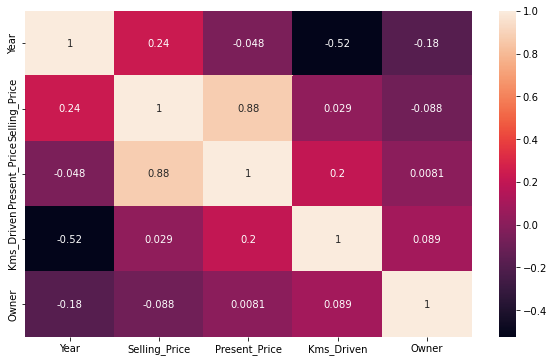

In [23]:
sns.heatmap(df.corr(), annot=True);

In [26]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


 # Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [30]:
df = df.join(df["Fuel_Type"].str.get_dummies(sep = ",").add_prefix("Fuel_Type_"))
df = df.join(df["Transmission"].str.get_dummies(sep = ",").add_prefix("Transmission_"))
df = df.join(df["Seller_Type"].str.get_dummies(sep = ",").add_prefix("Seller_"))

In [31]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Dealer,Seller_Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0


In [32]:
df.drop(["Fuel_Type","Seller_Type","Transmission", "Fuel_Type_CNG"] , axis = 1, inplace = True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Dealer,Seller_Individual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1,1,0
297,brio,2015,4.00,5.90,60000,0,0,1,0,1,1,0
298,city,2009,3.35,11.00,87934,0,0,1,0,1,1,0
299,city,2017,11.50,12.50,9000,0,1,0,0,1,1,0


In [38]:
df = pd.get_dummies(df)

In [39]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Dealer,Seller_Individual,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,...,Car_Name_Royal Enfield Thunder 350,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
0,2014,3.35,5.59,27000,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,

### Features and target variable

In [40]:
X = df.drop(columns="Selling_Price")
y = df['Selling_Price']

### Splitting data into training and testing

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##  Model Building (Linear Regression)

In [42]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")


# Interpret the model

In [44]:
lm = LinearRegression()

lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = lm.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)
print()
print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Train Results
rmse: 1.061161965540101
r2:  0.9541180210314136

Test Results
rmse: 2.1662303628513575
r2:  0.835199798785767


In [45]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    
    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}

ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.061162,2.166230
mae,0.580915,1.199427
mse,1.126065,4.692554
R2,0.954118,0.835200


In [46]:
pd.concat([ls], axis=1)

,lm_train,lm_test
rmse,1.061162,2.166230
mae,0.580915,1.199427
mse,1.126065,4.692554
R2,0.954118,0.835200


# Model Evaluation

In [47]:
from sklearn.model_selection import cross_validate, cross_val_score
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)


In [48]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.054974,0.028976,-1.140429,-2.670513,-28.186095,-5.309058
2,0.044973,0.037979,0.726923,-1.774571,-18.410006,-4.290688
3,0.048972,0.034980,0.674339,-1.232802,-4.088771,-2.022071
4,0.055967,0.042977,0.820868,-1.470574,-4.489359,-2.118811
5,0.126929,0.111936,0.857432,-0.658237,-0.733408,-0.856392
6,0.104939,0.042977,0.823124,-1.092738,-3.024373,-1.739072
7,0.033970,0.054967,0.859065,-1.351127,-6.738670,-2.595895
8,0.085952,0.034980,0.712368,-1.393512,-4.876207,-2.208214
9,0.110937,0.034981,0.881363,-1.137749,-2.842238,-1.685894
10,0.025975,0.028983,0.879116,-0.787082,-1.196635,-1.093908


In [49]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.609417
test_neg_mean_absolute_error       -1.356891
test_neg_mean_squared_error        -7.458576
test_neg_root_mean_squared_error   -2.392000
dtype: float64

In [50]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.835199798785767
MAE 		: 1.1994267711349937
MSE 		: 4.692553984939124
RMSE 		: 2.1662303628513575


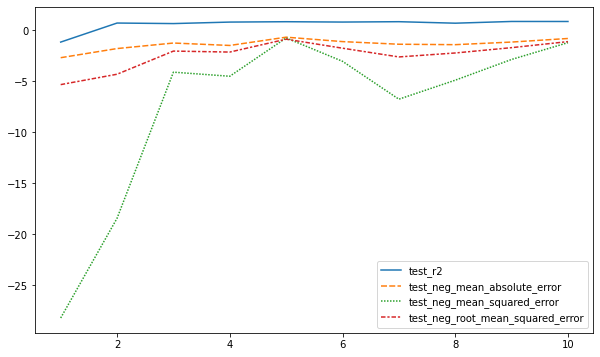

In [51]:
sns.lineplot(data = scores.iloc[:,2:]);

In [52]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,4.528179e-01
1,6.286565e-01
2,-2.403673e-05
3,-1.138225e-01
4,2.523360e+00
...,...
103,6.344353e-01
104,7.654871e-03
105,5.551115e-17
106,1.370962e+00


# Regularization

In [53]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

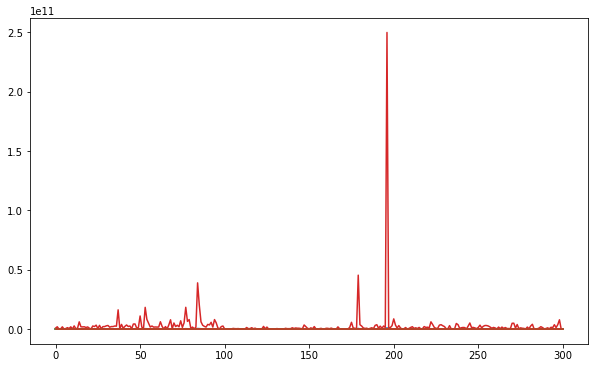

In [54]:
plt.plot(poly_features);

# Ridge

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge_model = Ridge(alpha=1)

In [57]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [58]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9355500394321116
MAE 		: 0.7651401701720087
MSE 		: 1.5817719341236425
RMSE 		: 1.257685149043131


In [59]:
y_test_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9078263520628566
MAE 		: 1.1599942165250747
MSE 		: 2.624570939519355
RMSE 		: 1.6200527582518278


In [60]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.257685,1.620053
mae,0.765140,1.159994
mse,1.581772,2.624571
R2,0.935550,0.907826


In [61]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,1.061162,2.166230,1.257685,1.620053
mae,0.580915,1.199427,0.765140,1.159994
mse,1.126065,4.692554,1.581772,2.624571
R2,0.954118,0.835200,0.935550,0.907826


In [62]:
ridgecv  = RidgeCV(alphas = 10**np.linspace(10,-2,100)*0.5, scoring = "neg_mean_squared_error", 
                   cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

y_train_pred = ridge_tuned.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = ridge_tuned.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print("Optimal lambda: " ,ridgecv.alpha_)

print()

print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Optimal lambda:  0.14240179342179024

Train Results
rmse: 1.1066226661363272
r2:  0.9501026003826569

Test Results
rmse: 1.8124097983176182
r2:  0.8846384021265041


In [63]:
ridgecv_scores = {"ridgecv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    
    "ridgecv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}

rcvs =pd.DataFrame(ridgecv_scores)
rcvs

,ridgecv_train,ridgecv_test
rmse,1.106623,1.812410
mae,0.611123,1.215488
mse,1.224614,3.284829
R2,0.950103,0.884638


In [64]:
pd.concat([ls, rs, rcvs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test
rmse,1.061162,2.166230,1.257685,1.620053,1.106623,1.812410
mae,0.580915,1.199427,0.765140,1.159994,0.611123,1.215488
mse,1.126065,4.692554,1.581772,2.624571,1.224614,3.284829
R2,0.954118,0.835200,0.935550,0.907826,0.950103,0.884638


# Lasso

In [67]:
from sklearn.linear_model import Lasso, LassoCV

In [68]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [69]:
y_train_pred = lasso_model.predict(X_train)

In [70]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8356651722276249
MAE 		: 1.230776891089614
MSE 		: 4.033209889951397
RMSE 		: 2.008285310893698


In [71]:
y_test_pred = lasso_model.predict(X_test)

In [72]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8396199056735947
MAE 		: 1.456700634868869
MSE 		: 4.5666949748316705
RMSE 		: 2.1369826800495297


In [73]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.008285,2.136983
mae,1.230777,1.456701
mse,4.033210,4.566695
R2,0.835665,0.839620


In [74]:
pd.concat([ls, rs, rcvs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test
rmse,1.061162,2.166230,1.257685,1.620053,1.106623,1.812410,2.008285,2.136983
mae,0.580915,1.199427,0.765140,1.159994,0.611123,1.215488,1.230777,1.456701
mse,1.126065,4.692554,1.581772,2.624571,1.224614,3.284829,4.033210,4.566695
R2,0.954118,0.835200,0.935550,0.907826,0.950103,0.884638,0.835665,0.839620


In [75]:
lassocv  = LassoCV(alphas = 10**np.linspace(10,-2,100)*0.5, max_iter=100000, cv = 10, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_tuned = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)

y_train_pred = lasso_tuned.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = lasso_tuned.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print("Optimal lambda: " , lassocv.alpha_)

print()

print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Optimal lambda:  0.020185086292982747

Train Results
rmse: 1.5070419337144458
r2:  0.9074600066110879

Test Results
rmse: 1.694127613832825
r2:  0.8992046022881822


In [76]:
lasso_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
lcvs = pd.DataFrame(lasso_scores)
lcvs


,lasso_cv_train,lasso_cv_test
rmse,1.507042,1.694128
mae,1.006850,1.174568
mse,2.271175,2.870068
R2,0.907460,0.899205


In [77]:
pd.concat([ls, rs, rcvs, lss, lcvs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,1.061162,2.166230,1.257685,1.620053,1.106623,1.812410,2.008285,2.136983,1.507042,1.694128
mae,0.580915,1.199427,0.765140,1.159994,0.611123,1.215488,1.230777,1.456701,1.006850,1.174568
mse,1.126065,4.692554,1.581772,2.624571,1.224614,3.284829,4.033210,4.566695,2.271175,2.870068
R2,0.954118,0.835200,0.935550,0.907826,0.950103,0.884638,0.835665,0.839620,0.907460,0.899205


## Elastic-Net 

In [78]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [79]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [80]:
elastic_model.l1_ratio

0.5

In [81]:
elastic_model.alpha

1.0

In [82]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8393598698919212
MAE 		: 1.2232761256943636
MSE 		: 3.9425322693762843
RMSE 		: 1.9855810911106815


In [83]:
y_test_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8460244412267115
MAE 		: 1.4321927972513324
MSE 		: 4.384330944872787
RMSE 		: 2.093879400747041


In [84]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.985581,2.093879
mae,1.223276,1.432193
mse,3.942532,4.384331
R2,0.839360,0.846024


In [85]:
pd.concat([ls, rs, rcvs, lss, lcvs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.061162,2.166230,1.257685,1.620053,1.106623,1.812410,2.008285,2.136983,1.507042,1.694128,1.985581,2.093879
mae,0.580915,1.199427,0.765140,1.159994,0.611123,1.215488,1.230777,1.456701,1.006850,1.174568,1.223276,1.432193
mse,1.126065,4.692554,1.581772,2.624571,1.224614,3.284829,4.033210,4.566695,2.271175,2.870068,3.942532,4.384331
R2,0.954118,0.835200,0.935550,0.907826,0.950103,0.884638,0.835665,0.839620,0.907460,0.899205,0.839360,0.846024


In [86]:
enet_cv  = ElasticNetCV(alphas = 10**np.linspace(10,-2,100)*0.5, l1_ratio=[.1,.2,.3,.5,.7,.8,.9,1], 
                        max_iter=100000, cv = 10, normalize = True)

enet_cv.fit(X_train, y_train)
enet_cv.alpha_

enet_tuned = ElasticNet(alpha = enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_).fit(X_train, y_train)

y_train_pred = enet_tuned.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = enet_tuned.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print('Optimal lambda: ', enet_cv.alpha_)
print("Optimal l1_ratio", enet_cv.l1_ratio_)

print()

print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Optimal lambda:  0.005
Optimal l1_ratio 0.9

Train Results
rmse: 1.224399341841964
r2:  0.9389163520486511

Test Results
rmse: 1.686693433919489
r2:  0.9000872831505821


In [87]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
ecvs = pd.DataFrame(elastic_cv_scores)
ecvs

,elastic_cv_train,elastic_cv_test
rmse,1.224399,1.686693
mae,0.773347,1.115245
mse,1.499154,2.844935
R2,0.938916,0.900087


In [88]:
pd.concat([ls,rs, rcvs, lss, lcvs, es, ecvs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,1.061162,2.166230,1.257685,1.620053,1.106623,1.812410,2.008285,2.136983,1.507042,1.694128,1.985581,2.093879,1.224399,1.686693
mae,0.580915,1.199427,0.765140,1.159994,0.611123,1.215488,1.230777,1.456701,1.006850,1.174568,1.223276,1.432193,0.773347,1.115245
mse,1.126065,4.692554,1.581772,2.624571,1.224614,3.284829,4.033210,4.566695,2.271175,2.870068,3.942532,4.384331,1.499154,2.844935
R2,0.954118,0.835200,0.935550,0.907826,0.950103,0.884638,0.835665,0.839620,0.907460,0.899205,0.839360,0.846024,0.938916,0.900087
